In [50]:
#importing libraries necessary for the project
#pandas for reading csv and interacting with data
#matplotlib to visualise data
#Logistic Regression for the classification of whether to Approve loan or not
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [51]:
#code to import data
df = pd.read_csv("C:\\Users\\Prakashmani\\Downloads\\loanf.csv")

In [52]:
#to display the first 5 values of the dataframe
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [68]:
#the data is yet not ready for training the model
#to make it ready we first filter and convert the interest into binary values true and false and save it to new_interest
df["new_interest"] = df["Interest.Rate"]<17

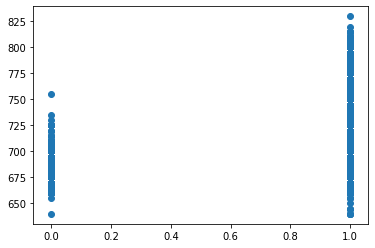

In [69]:
#to visualise the relationship between FICO.Score and new_interest
plt.scatter(df["new_interest"],df["FICO.Score"])

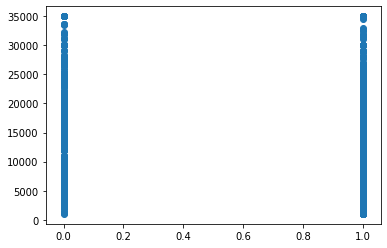

In [70]:
#to visvalise the relationship between Loan.Amount and new_interest
plt.scatter(df["new_interest"],df["Loan.Amount"])

In [71]:
#making input and output data to train the model
trainx = df[["FICO.Score","Loan.Amount"]] #train input
trainy = df["new_interest"] #train expected output

In [57]:
#declaring the model
model = LogisticRegression()

In [58]:
#training the model using the training data we prepared
model.fit(trainx,trainy)

C:\Users\Prakashmani\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
#function which takes data input to predict if the load is to be apporved or not using our trained model
def Loan_approval(F_score,Amount):
    out = model.predict_proba([[F_score,Amount]])
    if out[0][0] < 0.4:
        print("Loan_approved")
    else:
        print("Loan not approved")

In [73]:
#library to make the bar type interaction below
from ipywidgets import interact

In [74]:
#the interact taked parameter(function,data=(range),data2=(range),,,,)
interact(Loan_approval,F_score=(300,850),Amount=(200,100000))

interactive(children=(IntSlider(value=575, description='F_score', max=850, min=300), IntSlider(value=50100, de…

<function __main__.Loan_approval(F_score, Amount)>

In [75]:
#predicting for all the values of training data
predict = model.predict(trainx)

In [76]:
#to check for accuracy
from sklearn.metrics import accuracy_score

In [77]:
#we feed the predicted data by our model and actual output as parameters for the accuracy score
accuracy_score(predict,trainy)

0.8272